<a href="https://colab.research.google.com/github/shiniganmi001/AAD-Project/blob/main/CSAI_2019113024_A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CS9.432.S22: Cognitive Science and AI
# K Ganesh Chandan 2019113024
# Assignment 1 -Basic understanding and masking of brain images with Nilearn


In [3]:
!pip install nilearn

     |████████████████████████████████| 10.0 MB 21.1 MB/s 


In [4]:
import nilearn

In [5]:
# This might take a while, depending on your internet speed
from nilearn import datasets
haxby_dataset = datasets.fetch_haxby(data_dir=None)
# by default this function returns images of second subject from the Haxby study
# ignore warnings or if you don't want warnings, uncomment and run below code
# import warnings
# warnings.simplefilter("ignore")


/usr/local/lib/python3.7/dist-packages/nilearn/datasets/__init__.py:96: FutureWarning: Fetchers from the nilearn.datasets module will be updated in version 0.9 to return python strings instead of bytes and Pandas dataframes instead of Numpy arrays.
  "Numpy arrays.", FutureWarning)
 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)



Dataset created in /root/nilearn_data/haxby2001



Downloaded 248815616 of 291168628 bytes (85.5%,    0.3s remaining) ...done. (2 seconds, 0 min)
Extracting data from /root/nilearn_data/haxby2001/f33ff337e914bf7fded743c7107979f9/subj2-2010.01.14.tar.gz..... done.


In [6]:
print(datasets.get_data_dirs())

['/root/nilearn_data']


In [7]:
# The different pieces of information
print(sorted(list(haxby_dataset.keys())))

['anat', 'description', 'func', 'mask', 'mask_face', 'mask_face_little', 'mask_house', 'mask_house_little', 'mask_vt', 'session_target']


In [8]:
print(haxby_dataset['description'].decode("utf-8"))

Haxby 2001 results


Notes
-----
Results from a classical fMRI study that investigated the differences between
the neural correlates of face versus object processing in the ventral visual
stream. Face and object stimuli showed widely distributed and overlapping
response patterns.

Content
-------
The "simple" dataset includes
    :'func': Nifti images with bold data
    :'session_target': Text file containing session data
    :'mask': Nifti images with employed mask
    :'session': Text file with condition labels


The full dataset additionally includes
    :'anat': Nifti images with anatomical image
    :'func': Nifti images with bold data
    :'mask_vt': Nifti images with mask for ventral visual/temporal cortex
    :'mask_face': Nifti images with face-reponsive brain regions
    :'mask_house': Nifti images with house-reponsive brain regions
    :'mask_face_little': Spatially more constrained version of the above
    :'mask_house_little': Spatially more constrained version of the abov

In [9]:
# TODO 1: print anatomical and functional image to locate their paths
print(haxby_dataset['anat']) # insert anatomical image key here
print(haxby_dataset['func']) # insert functional image key here

['/root/nilearn_data/haxby2001/subj2/anat.nii.gz']
['/root/nilearn_data/haxby2001/subj2/bold.nii.gz']


In [10]:
from nilearn import image

In [11]:
# TODO 2: Load anatomical image and functional image
anatomical = image.load_img(img=haxby_dataset['anat']) # specify the relevant input here
type(anatomical)

nibabel.nifti1.Nifti1Image

In [12]:
functional = image.load_img(img=haxby_dataset['func']) # specify the functional image
type(functional)

nibabel.nifti1.Nifti1Image

In [13]:
anatomical_image_shape = anatomical.shape
functional_image_shape = functional.shape
assert(anatomical_image_shape == (124, 256, 256, 1))
assert(functional_image_shape == (40, 64, 64, 1452))

In [14]:
functional_image_shape

(40, 64, 64, 1452)

In [22]:
# TODO 3: Wildcard like path should be specificied to load all mask images at once
all_mask_images = image.load_img('/root/nilearn_data/haxby2001/subj2/mask*')
assert(all_mask_images.shape == (40, 64, 64, 5))

In [23]:
from nilearn import plotting

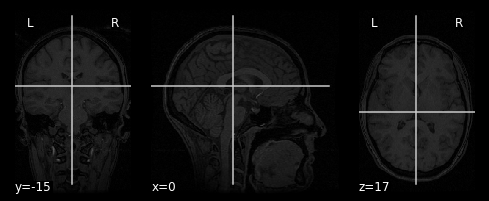

In [24]:
plotting.plot_anat(anatomical)
plotting.show() # equivalent to %matplotlib inline in Jupyter or Colab Notebook

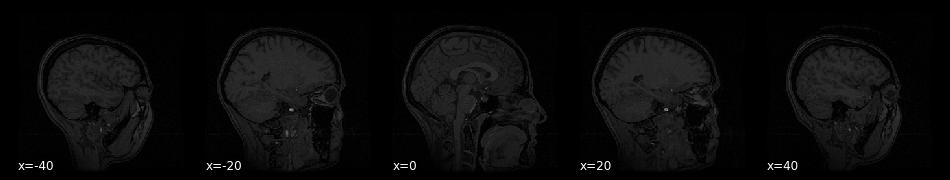

In [25]:
plotting.plot_anat(anatomical, display_mode='x', cut_coords=[-40, -20, 0, 20, 40])

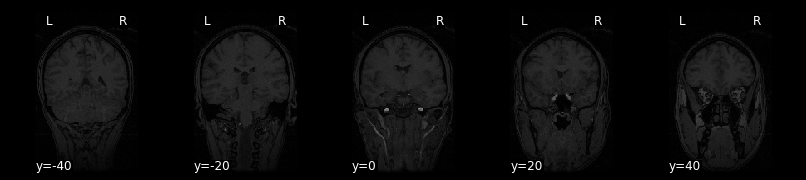

In [26]:
plotting.plot_anat(anatomical, display_mode='y', cut_coords=[-40, -20, 0, 20, 40])

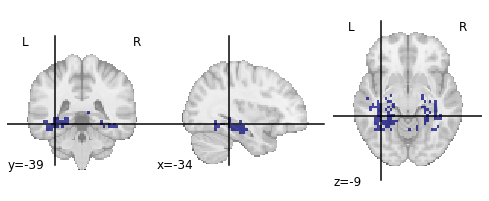

In [28]:
# TODO 4: Specify the mask image input to plot ROI images
plotting.plot_roi(roi_img='/root/nilearn_data/haxby2001/subj2/mask4_vt.nii.gz')

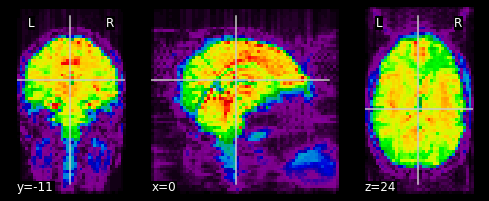

In [29]:
# Since we already imported image module from Nilearn, we can use it again here
# TODO 5: Specify functional image as input as it is 4D and we want to average in time
mean_functional_image = image.mean_img(imgs=functional)
assert(mean_functional_image.shape == (40, 64, 64))
# TODO 6: Visualize the mean image using `plotting.plot_epi`
plotting.plot_epi(epi_img=mean_functional_image)
plotting.show()


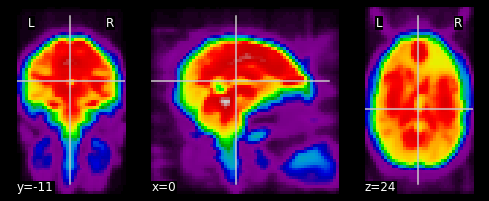

In [30]:
# TODO 7: Specify the mean functional image
smooth_mean_functional_image = image.smooth_img(imgs=mean_functional_image, fwhm=8)
# Visualize the smoothed image using `plotting.plot_epi`
# TODO 8: Specify the input
plotting.plot_epi(epi_img=smooth_mean_functional_image)


In [31]:
log_image = image.math_img("np.log(img)", img=anatomical)

<string>:1: RuntimeWarning: divide by zero encountered in log


In [32]:
# negate the image
negate_image = image.math_img("-img", img=anatomical)

In [33]:
# TODO 9: Use addition symbol with two images
add_anatomical_img_with_log_img = image.math_img("img1 + img2",
                                                 img1=anatomical,
                                                 img2=log_image)

<string>:1: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/nilearn/_utils/niimg.py:62: UserWarning: Non-finite values detected. These values will be replaced with zeros.
  "Non-finite values detected. "


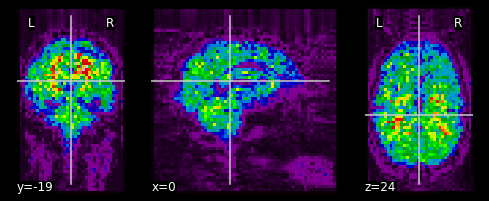

In [34]:
# TODO 10: Use Numpy functions
tsnr_functional_image = image.math_img("np.divide(np.mean(img, axis=3), np.std(img, axis=3))", img=functional)
plotting.plot_epi(tsnr_functional_image)
plotting.show()

In [35]:
# Implement here
# TODO 11: Follow the documentation of resample_to_img
resampled_image = image.resample_to_img(source_img=anatomical, 
                                        target_img=functional)
resampled_image.shape



/usr/local/lib/python3.7/dist-packages/nilearn/image/resampling.py:531: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


(40, 64, 64, 1)

In [39]:
resampled_image.affine == functional.affine

array([[ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True]])

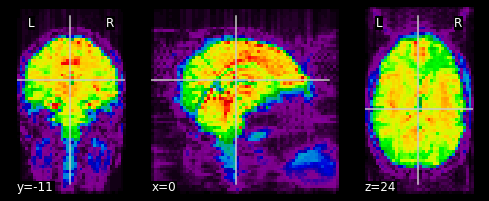

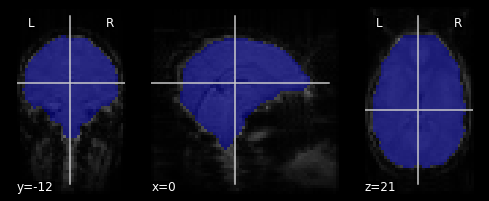

In [41]:
from nilearn import masking
# Let's compute the epi mask
func_mask = masking.compute_epi_mask(mean_functional_image)
# Visualize the mask that is computed on the mean functional image
plotting.plot_epi(mean_functional_image)
plotting.plot_roi(func_mask, mean_functional_image)
plotting.show() # equivalent to %matplotlib inline in Jupyter or Colab Notebook

In [42]:
print("Before masking, our data has shape %s ..." % (functional.shape,))
functional_masked = masking.apply_mask(functional, func_mask)
print("After masking, shape %s and is a %s" % (functional_masked.shape, type(functional_masked).__name__))

Before masking, our data has shape (40, 64, 64, 1452) ...
After masking, shape (1452, 24083) and is a ndarray


In [62]:
# TODO 12:
# Complete the block with face mask or any other mask by following above demo
face_mask_image = image.load_img(haxby_dataset['mask_face'])
print(face_mask_image.shape)
face_mask = masking.compute_epi_mask(face_mask_image)
masked = masking.apply_mask(face_mask_image, face_mask)
print(masked.shape)

(40, 64, 64, 1)
(1, 129600)


In [63]:
from nilearn.input_data import NiftiMasker

In [64]:
masker = NiftiMasker(mask_img=func_mask, verbose=True)

In [65]:
masked_functional_image = masker.fit_transform(functional)
print(masked_functional_image.shape)


[NiftiMasker.fit] Loading data from None
[NiftiMasker.fit] Resampling mask
[NiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(40, 64, 64, 1452),
affine=array([[  -3.5  ,    0.   ,    0.   ,   68.25 ],
       [   0.   ,    3.75 ,    0.   , -118.125],
       [   0.   ,    0.   ,    3.75 , -118.125],
       [   0.   ,    0.   ,    0.   ,    1.   ]])
)
[NiftiMasker.transform_single_imgs] Extracting region signals
[NiftiMasker.transform_single_imgs] Cleaning extracted signals
(1452, 24083)


In [67]:
# TODO 13:
# Implement the smoothing and mask strategy parameter here, inspired by above
masker = NiftiMasker(mask_img=func_mask,
                     smoothing_fwhm=7,
                     mask_strategy='epi',
                     verbose=True)
smoothed_masked_functional_image = masker.fit_transform(functional)
print(smoothed_masked_functional_image.shape)


[NiftiMasker.fit] Loading data from None
[NiftiMasker.fit] Resampling mask
[NiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(40, 64, 64, 1452),
affine=array([[  -3.5  ,    0.   ,    0.   ,   68.25 ],
       [   0.   ,    3.75 ,    0.   , -118.125],
       [   0.   ,    0.   ,    3.75 , -118.125],
       [   0.   ,    0.   ,    0.   ,    1.   ]])
)
[NiftiMasker.transform_single_imgs] Smoothing images
[NiftiMasker.transform_single_imgs] Extracting region signals
[NiftiMasker.transform_single_imgs] Cleaning extracted signals
(1452, 24083)


[NiftiMasker.fit] Loading data from None
[NiftiMasker.fit] Resampling mask
[NiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(40, 64, 64, 1452),
affine=array([[  -3.5  ,    0.   ,    0.   ,   68.25 ],
       [   0.   ,    3.75 ,    0.   , -118.125],
       [   0.   ,    0.   ,    3.75 , -118.125],
       [   0.   ,    0.   ,    0.   ,    1.   ]])
)
[NiftiMasker.transform_single_imgs] Extracting region signals
[NiftiMasker.transform_single_imgs] Cleaning extracted signals
(1452, 23707)


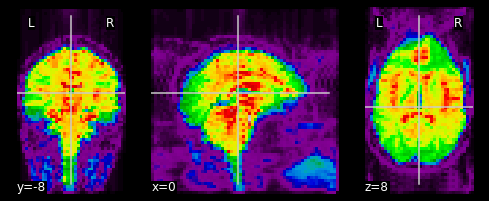

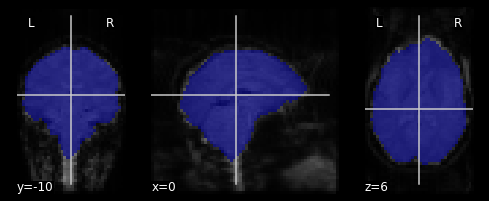

[[ 846. 1090.  896. ...  900.  711. 1241.]
 [ 833. 1116.  919. ...  874.  720. 1246.]
 [ 863. 1124.  954. ...  891.  725. 1233.]
 ...
 [ 951. 1089.  837. ...  799.  923. 1018.]
 [ 951. 1141.  876. ...  780.  940. 1033.]
 [ 943. 1100.  850. ...  773.  944. 1024.]]


In [78]:
# TODO 14: Until now we have looked at steps that lead to 2D from 4D. Now,
# Implement a simple masking pipeline:
# 1. Download the fMRI data (4D), a new subject from the Haxby dataset.
# E.g., if "subj2 is used already then download "subj1" or "subj3".
haxby_dataset_2 = datasets.fetch_haxby(subjects=1)
new_functional = image.load_img(haxby_dataset_2['func'])
# 2. Implement NiftiMasker, specify mask image while initialization of object
# and apply it on the fMRI data
new_mean_functional_image = image.mean_img(new_funcional)
new_func_mask = masking.compute_epi_mask(new_mean_functional_image)
new_masker = NiftiMasker(mask_img=new_func_mask,
                     verbose=True)
new_masked_functional_image = new_masker.fit_transform(new_functional)
print(new_masked_functional_image.shape)
# 3. Plot the mask image overlayed onto mean of fMRI data
plotting.plot_epi(new_mean_functional_image)
plotting.plot_roi(new_func_mask, new_mean_functional_image)
plotting.show() # equivalent to %matplotlib inline in Jupyter or Colab Notebook
# 4. Print the masked output, it should be 2D matrix
print(new_masked_functional_image)
